**Group Members:** Tony Liang (004), Wanxin luo (003), Xuan Chen (004)

**Student Numbers:** 39356993, 33432808, 15734643


ECON 323 Quantitative Economic Modelling with Data Science Applications UBC 2023

# Boston Housing Price Prediction Proposal

In [1]:
# Imports of libraries
import pandas as pd
import numpy as np
#from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
# Models makeup
# linear models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# tree-like models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# custom function imports
from src.handle_data import get_data, split_data, preprocess_data
from src.modelling import OLS, mean_std_cross_val_scores
from src.plotting import eda_plot
# plot imports
from scipy import stats

## Introduction

In this project, we aim to **explore the impact of environmental factors on housing prices** using the [Boston Housing dataset](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data.). This dataset contains information on various attributes such as crime rate, average number of rooms, accessibility to highways, and more, which are hypothesized to influence housing prices. The project will involve several parts, including data cleaning, visualization, and model building. Our objective is to conduct exploratory data analysis (EDA) and then build a hedonic regression model with multiple inputs. We will utilize various Python techniques learned in this course to explore the real world data and solve economic questions.

By analyzing the data, we aim to answer economic questions related to the housing market and explore the real-world application of Python techniques. It is important to note that the dataset has its limitations as it was collected almost 50 years ago, but it still provides an excellent opportunity for us to apply our Python skills and gain insights of housing market.
<!--- Original--->
---
<!--- Edit from Sherry--->

Boston, a thriving metropolitan city known for its rich history and cultural significance, has grappled with the challenge of crime rateand its potential impact on housing prices. Based on past data, the crime rate in Boston is nearly double the national crime rate.In this research, we aim to shed light on the relationship between crime rate and housing prices in Boston, drawing on a hedonic regression model to quantitatively analyze data. Drawing on a comprehensive set of variables, including not only structural characteristics of the housing but also hedonic variables such as crime occurrences in the neighborhood, toursim factor as Charles River and lower status of the population, we seek to provide insights into how crime impacts housing prices in Boston, and to what extent it influences the dynamics of the local real estate market. Our hypothesis aim to show that the **increasing criminal rate in Boston is a significant factor in the determination of housing market prices**.



### Dataset Description

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston, MA. The following describes the dataset columns:

- `CRIM` - per capita crime rate by town
- `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS` - proportion of non-retail business acres per town.
- `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `NOX` - nitric oxides concentration (parts per 10 million)
- `RM` - average number of rooms per dwelling
- `AGE` - proportion of owner-occupied units built prior to 1940
- `DIS` - weighted distances to five Boston employment centres
- `RAD` - index of accessibility to radial highways
- `TAX` - full-value property-tax rate per $10,000$
- `PTRATIO` - pupil-teacher ratio by town
- $B - 1000(Bk - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- `LSTAT` - $%$ lower status of the population
- `MEDV` - Median value of owner-occupied homes in $1000$'s

The dataset is derived from https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data.

<!--- Original --->
---
<!--- Edit --->
Housing is a heterogenous good, which comprises a collection of attributes, and its price is determined by the implicit prices of those attributes. The attributes that determine the price of housing can be broadly classified into three groups: site characteristics, neighborhood characteristics, and environmental characteristics. 
- The site characteristics include： `ZN`、`RM`、`AGE`、`TAX`、`MEDV`
- The neighborhood characteristics include：`CRIM`、`INDUS`、`CHAS`、`DIS`、`RAD` 、`PTRATIO`、`LSTAT`、`B`
- The environmental characteristics include：`NOX`

## Methods

This report strives to be trustworthy using the following steps: 

1. [Data cleaning](#data-cleaning)
2. [Thorough EDA](#eda)
3. [Building multiple linear regression model](#model-fitting)

**Note**: this could be subjected to changes later after feedback from the ECON323 Instrutor's team


### Data Cleaning

For the data cleaning step, we will check and handle the missing values in the dataset. We will also identify categorical and continuous variables. For instance, the `CHAS` variable is a dummy variable indicating whether the tract bounds the Charles River or not, and is encoded as 0 or 1. Moreover, perform any special treatments toward outliers depending on the method that will be carried in the [model fitting phase](#model-fitting).

### EDA

During the EDA phrase, we will conduct a thorough examination of the Boston Housing dataset. One of the key steps is to generate a correlation matrix, which can help us identify any potential issues related to multicollinearity between the independent variables. In addition, we will use side-by-side box plots to visualize the distributions of the continuous variables and detect any potential outliers or anomalies. Moreover, we will leverage other data visualization techniques, such as scatter plots and histograms, to better understand the relationships between the variables and explore potential trends or patterns in the data. Overall, the goal of EDA is to gain insights into the data and inform our subsequent modelling steps. 

In [2]:
# read in the dataset
data_path = 'data/boston_housing_data.csv'
boston = get_data(data_path=data_path)
# check the first rows of the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
# summarize the dataset 
boston.describe()

According to the summary table above, we can see the basic statistical information for numerical data, including count, mean, standard deviation, minimum, 25% percentile, median, 75% percentile, and maximum. 

Certainly, there is one column in the dataset that requires special attention, which is the CHAS column. CHAS is a dummy variable that takes a value of 1 if the property is adjacent to the Charles River, and 0 otherwise. The CHAS are 0 for the 25th, 50th, and 75th percentiles, indicating that the distribution of this variable is skewed. To gain a deeper understanding of the data and identify any interesting trends or statistics, it may be beneficial to visualize the dataset through plotting.

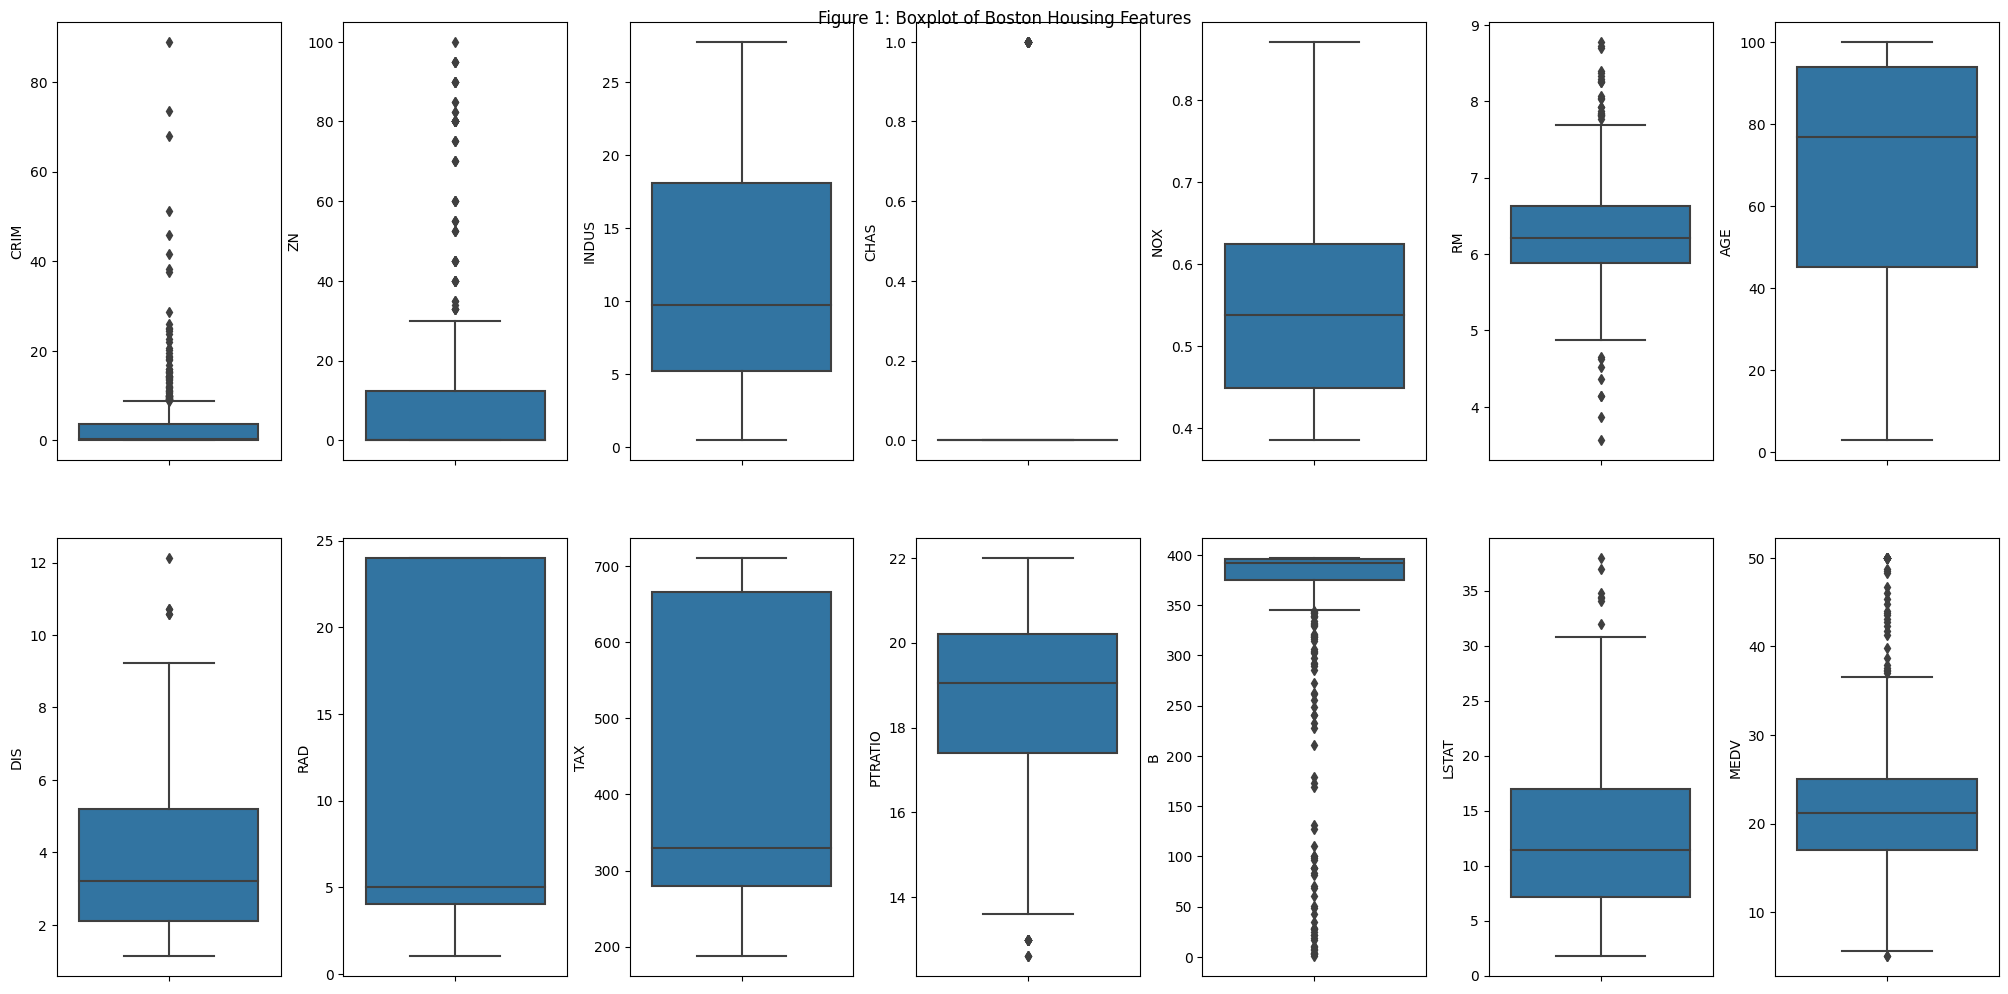

In [3]:
eda_plot(data = boston, title = 'Figure 1: Boxplot of Boston Housing Features', option = "box")

According to the Figure 1 above, we can observe that several columns in the Boston dataset such as CRIM, ZN, RM, and B appear to have many outliers. In the context of machine learning, extreme outliers can be problematic because they can skew statistical measures such as mean and standard deviation. 

In [ ]:
eda_plot(data = boston, title = 'Figure 2: Histogram of Boston Housing Features', option = "hist")

In addition to identifying outliers, it is also important to understand the distributions of the individual columns in the dataset. The histograms generated earlier suggest that columns CRIM, ZN, LSTAT, DIS and B have skewed distributions. 
The distributions of the other columns appear to be normal or bimodal, except for CHAS, which is a discrete variable.
In contrast, the histogram of MEDV (the variable we are trying to predict) appears to have a roughly normal distribution.

In [ ]:
eda_plot(data = boston, title = 'Figure 3: Correlation Matrix Heatmap for Boston Dataset', option = "heatmap")

Based on the Figure 3 above, it can be observed that there are several variables that exhibit a strong correlation with the target variable, MEDV. Specifically, the variable RM exhibits a correlation coefficient of 0.7 with MEDV, while LSTAT exhibits a correlation coefficient of 0.74 with MEDV. These correlations are relatively high compared to the other variables, and suggest that RM and LSTAT may be useful predictors for our regression model.

However, it is also important to note that the variable TAX exhibits a strong correlation with the variable RAD, with a correlation coefficient of 0.91. This suggests the presence of multicollinearity, which can cause issues in regression analysis such as inflated standard errors, reduced statistical power, and unstable coefficients. Therefore, it may be necessary to address multicollinearity in the modeling process, perhaps deleting one of the predictors.

### Model Fitting

In the model fitting phase, we will split the Boston Housing dataset into training and testing sets. We will then use the training set to select the relevant variables and build our final multiple linear regression model. The selection process can involve various techniques, such as stepwise regression or regularization, depending on the specific requirements of the project. Once we have the final model, we will use the testing set to evaluate its performance in terms of mean squared error (`MSE`). The goal is to ensure that the model can generalize well to new, unseen data and make accurate predictions. 

To further explore effects of using different methods of regression, we are going to fit multiple models to using similar metrics accross these to compare best fit of model, i.e. Bayesian Information Criterion (BIC) and Adjusted $R^2$ for inference (how well our model explains the effects of the explanatory variables is of the variable of interes); Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for prediction purposes models. Our ideal approach to test this is to fit the following models:
1. Ordinary Least Squares (OLS) as baseline 
2. OLS with L1-norm regularization (Least Absolute Shrinkage and Selection Operator (LASSO Regression) )
3. Random Forest Regression

#### Load and Split data

To begin, we will have a common block to define function to split the data into train and test data for further modelling purposes.

In [4]:
# Splits the data into X and y train and test portions
X_train, X_test, y_train, y_test = split_data(data_path, proportion = 0.75, target = "MEDV", random_state=20230325)

Moreover, we are going to use common scoring metrics across all models so that we could compare their effectiveness in prediction, see the followings:
- $R^2$
- Root Mean Squared Error (RMSE)
- Mean Absolute Percentange Error (MAPE)
- Mean Squared Error (MSE)

In [ ]:
# define common scoring across models
scoring = {
    "neg_rmse": "neg_root_mean_squared_error",
    "neg_mape": "neg_mean_absolute_percentage_error", 
    "neg_mse": "neg_mean_squared_error",
}

#### Overall

We could fit all the previous models mentioned at once and perform cross validation, in a more rapid way to compare and check which might perform better at **predicting house prices**.
Then we could fit the methods individually in sections below to make sure we are getting a similar or reproducible score.

In [ ]:
# fit all models at once to decide which one to use
# User-defined scoring to be hanlde in-terms of calculating scores for model
# Note scikit learn implemented these scorings in negative scale to minimize loss
# which we will scale back to positive behind the scenes

def fit_all(scoring=scoring, **kwargs):
    methods = ["OLS", "LASSO", "Random Forest"]
    models = [mod for mod in [LinearRegression(), Lasso(), RandomForestRegressor()]]
    # allocate space to store model fitted outputss
    result_dict = {}
    # fit all of these models at once
    for method, model in zip(methods, models):
        result_dict[method] = mean_std_cross_val_scores(model, 
                                                       X_train, 
                                                       y_train, 
                                                       return_train_score=True,
                                                       scoring=scoring
                                                     )
    
    result = pd.DataFrame(result_dict)
    # rename the index to positive scale for easier comparison, replace the neg by empty
    return result.rename(lambda x: x.replace("_neg", ""))
all_result = fit_all(X_train=X_train, y_train=y_train)
all_result.style.set_caption("Means CVs and +- std for Regression Methods")

From above table, we could see fit time, score time, the scorings we set earlier **(MAPE, RMSE, MSE)**. And, each entry is the mean cross-validation (cv) scores $\pm$ the standard deviation. By quickly inspecting it,

#### Ordinary Least Squares (OLS)
In the first stage of modeling, we will apply the traditional hedonic ordinary least squares regression to determine the coefficients between housing characteristics and housing prices. With the OLS approach, we can estimate the impact of each attribute on the market value of a heterogeneous good, and then we estimate prices in the form of willingness to pay for one unit of change of that characteristic.

Now, we are going to fit a plain OLS regression model to act as our baseline model for comparing with other regression methods and see their improvements or weakness when applying regularization or boosting and bootstrapping. We propose a mixed model with different exponents for the explanatory variables as following form:

$$P = \beta_0 + \beta_1 \text{CRIM} + \beta_2 \text{ZN} +\beta_3 \text{INDUS}+\beta_4 \text{CHAS}+\beta_5 \text{NOX}+\beta_6 \text{RM}+\beta_7 \text{AGE}+\beta_8 \text{DIS}+\beta_9 \text{RAD}+\beta_{10} \text{TAX}+\beta_{11} \text{PTRATIO}+\beta_{12} \text{B}+\beta_{13} \text{LSTAT}+\beta_{14} \text{MEDV}$$

whereas $P$ is the dependent variable `Price of housing unit in Boston`, and other $\beta_i$ are beta estimates of independent variables $x_i \quad \forall i \in [0, 14]$, and $\beta_0$ is a special case, such it is the value of estimated $y$, where all the independent variables equal to 0.

Hence, above equation can be generalized into matrix form below:

$$Y = X\beta + \epsilon$$

where $X$ is the design matrix with leading column of 1s (to represent the intercept term) and columns of independent variables $x_1, \dots, x_{14}$, $\beta$ is the matrix of all estimates from $\beta_0, \dots, \beta_{14}$, and $\epsilon$ is the  random error of measurements

Then solving for $\beta$ yields to the following:

$$\beta = (X^{T}X)^{-1}X^{T}Y$$

Hence, we could use this above to solve for our regression.

In [ ]:
# Just use scikit-learn's builtin fun first


#### LASSO Regression

#### Random Forest

Other than using linear models, we are so using tree-like models, particularly ensembles of multiple decision regression trees which is a Random Forest.

In [ ]:
def fit_random_forest(X_train, y_train, scoring=scoring):
    rf = RandomForestRegressor(random_state=123)
    #pipe = make_pipeline(preprocessor, rf)
    result = mean_std_cross_val_scores(
        rf, X_train, y_train, return_train_score=False, scoring=scoring
    )
    out = pd.DataFrame(result).T
    return out
    

In [ ]:
fit_random_forest(X_train, y_train)

## Division of Labor
Based on the previous discussions, the team has divided the responsibilities as follows:

- Tony: Coding
- Wanxin: Coding and some textual descriptions
- Xuan: Written section of the report

However, the team may make adjustments to the division of labor as needed during the project to ensure that all tasks are completed efficiently and effectively. Effective communication and collaboration within the team will be critical to ensure that everyone is working together towards the same goal.

## References

Vishal, V. (2017, October 27). Boston Housing Dataset. Kaggle. Retrieved March 14, 2023, from https://www.kaggle.com/datasets/altavish/boston-housing-dataset 

## Unused Code

<!-- According to the summary table above, we can see the basic statistical information for numerical data, including count, mean, standard deviation, minimum, 25% percentile, median, 75% percentile, and maximum. 

Certainly, there is one column in the dataset that requires special attention, which is the CHAS column. CHAS is a dummy variable that takes a value of 1 if the property is adjacent to the Charles River, and 0 otherwise. The CHAS are 0 for the 25th, 50th, and 75th percentiles, indicating that the distribution of this variable is skewed. To gain a deeper understanding of the data and identify any interesting trends or statistics, it may be beneficial to visualize the dataset through plotting.### Model Fitting

In the model fitting phase, we will split the Boston Housing dataset into training and testing sets. We will then use the training set to select the relevant variables and build our final multiple linear regression model. The selection process can involve various techniques, such as stepwise regression or regularization, depending on the specific requirements of the project. Once we have the final model, we will use the testing set to evaluate its performance in terms of mean squared error (`MSE`). The goal is to ensure that the model can generalize well to new, unseen data and make accurate predictions. 

To further explore effects of using different methods of regression, we are going to fit multiple models to using similar metrics accross these to compare best fit of model, i.e. Bayesian Information Criterion (BIC) and Adjusted $R^2$ for inference (how well our model explains the effects of the explanatory variables is of the variable of interes); Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for prediction purposes models. Our ideal approach to test this is to fit the following models:
1. Ordinary Least Squares (OLS) as baseline 
2. OLS with L2-norm regularization (Ridge Regression)
3. OLS with L1-norm regularization (Least Absolute Shrinkage and Selection Operator (LASSO Regression) )
4. Decision Tree Regression
5. Random Forest Regression -->

In [ ]:
# get the intercept and beta estimates
# scikit-learn imported function
# model = LinearRegression().fit(X_train, y_train)
# self-defined function
# intercept, estimates = OLS(X_train, y_train)
# Use this option to NOT show scientific notation (default shows scientific notation)
# np.set_printoptions(suppress=True)
# # print the estimates from self-defined func
# print(f"From self defined OLS, the intercept is {round(intercept,3)}, \nAnd beta estimates are: \n{np.ndarray.round(estimates, decimals=3)}")

# # prints the estimates from scikit-learn to inspect and compare
# print(f"\nFrom scikit-learn function, the intercept is {round(model.intercept_, 3)}, \nAnd beta estimates are: ")
# print(np.ndarray.round(model.coef_[1:], decimals=3))